# 목차
+ train_test_split
+ 교차검증
    + KFold
    + Stratified KFold
    + cross_val_score()
    + GridSearchCV
+ 데이터 전처리
    + 레이블 인코딩
    + 원핫 인코딩
    + 피처 스케일링과 정규화
        + StandardScaler
        + MinMaxScaler
+ 평가
    + 정확도 (accuracy)
    + 오차 행렬
    + 정밀도와 재현율
    + F1 스코어
    + ROC 곡선과 AUC
    + 피마 인디언 당뇨병 예측

In [39]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [40]:
keys = iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [41]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### 1. 학습 / 테스트 데이터 세트 분리 - train_test_split()

##### 아래와 같이 train_data 와 test_data 를 나누지 않으면 정확도를 예측할 수 없다.

In [44]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
df_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
df_clf.fit(train_data, train_label)

pred = df_clf.predict(train_data) # 위와 같이 train_data 와 test_data 를 나누지 않으면 정확도를 예측할 수 없다..predict(train_data)
print("예측 정확도:", accuracy_score(train_label, pred))

예측 정확도: 1.0


In [45]:
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state=1)

df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
print("예측 정확도:", accuracy_score(y_test, pred))

예측 정확도: 0.9555555555555556


#### 2. 교차검증

#### - KFold

In [46]:
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5 개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print("붓꽃 데이터 세트 크기:", features.shape[0])

붓꽃 데이터 세트 크기: 150


In [47]:
n_iter = 0

# KFold 객체의 split() 를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array 로 변환.
for train_index, test_index in kfold.split(features):
    #kfold.split() 으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred, 4))
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print("\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}".format(n_iter, accuracy, train_size, test_size))
    print("#{0} 검증 세트 인덱스:{1}".format(n_iter, test_index))
    cv_accuracy.append(accuracy)
          
# 개별 iteration 별 정확도를 합하여 평균 정확도 계산
print("\n## 평균 검증 정확도:", np.mean(cv_accuracy))


1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 1.0


c:\users\k58m\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass normalize=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\k58m\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass normalize=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\k58m\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass normalize=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\k58m\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: 

#### - Stratified KFold

In [48]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df["label"].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

#### 아래처럼 정렬된 데이터를 고르게 분포하지 않고 학습을 하게 된다면 절대 결과를 예측하지 못한다.

In [49]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df["label"].iloc[test_index]
    print("## 교차검증: {0}".format(n_iter))
    print("학습 레이블 데이터 분포:\n", label_train.value_counts())
    print("검증 레이블 데이터 분포:\n", label_test.value_counts(), "\n\n")
    
    

## 교차검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64 


## 교차검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64 


## 교차검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64 




#### StraitifiedKFold 는 위와 같은 현상을 해결해준다.

In [50]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df["label"]):
    n_iter += 1
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print("## 교차검증: {0}".format(n_iter))
    print("학습 레이블 데이터 분포: \n", label_train.value_counts())
    print("검증 레이블 데이터 분포: \n", label_train.value_counts())

## 교차검증: 1
학습 레이블 데이터 분포: 
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 2    34
1    33
0    33
Name: label, dtype: int64
## 교차검증: 2
학습 레이블 데이터 분포: 
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    34
2    33
0    33
Name: label, dtype: int64
## 교차검증: 3
학습 레이블 데이터 분포: 
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    34
2    33
1    33
Name: label, dtype: int64


In [51]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

print(features[0:5])
print(label[0:5])

# StratifiedKFold 의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split() 으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print("\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}"
             .format(n_iter, accuracy, train_size, test_size))
    print("\n{0} 검증 세트 인덱스: {1}".format(n_iter, test_index))
    print("\n{0} 검증 세트 데이터: {1}".format(n_iter, X_train))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print("\n## 교차 검증별 정확도:", np.round(cv_accuracy, 4))
print("## 평균 검증 정확도:", np.mean(cv_accuracy))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]

1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

1 검증 세트 데이터: [[5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [

#### - 교차 검증을 보다 간편하게 - cross_val_score()

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring="accuracy", cv=3)
print("교차 검증별 정확도:", np.round(scores, 4))
print("평균 검증 정확도:", np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


#### 3. GridSearechCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

In [53]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=121)

dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

In [54]:
import pandas as pd

# param_grid 의 하이퍼 파라미터를 3개의 train, test set fold 로 나누어 테스트 수행 설정.
# refit=True 가 default임. True 이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid 의 하이퍼 파라미터를 순차적으로 학습/ 평가.
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame 으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[["params", "mean_test_score", "rank_test_score", "split0_test_score", "split1_test_score", "split2_test_score"]]
# 아래 코드는 1위의 성능을 보인 하이퍼파라미터의 데이터프레임을 보여주는 코드이다.
# scores_df[scores_df.rank_test_score == 1][["params", "mean_test_score", "rank_test_score", "split0_test_score", "split1_test_score", "split2_test_score"]]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [55]:
print("GridSearchCV 최적 파라미터:", grid_dtree.best_params_)
print("GridSearchCV 최고 정확도:{0:.4f}".format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [56]:
# GridSearchCV 의 refit 으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV 의 best_estimator_ 는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print("테스트 데이터 세트 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


### 4. 데이터 전처리

#### - 레이블 인코딩

In [57]:
from sklearn.preprocessing import LabelEncoder

items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "믹서", "믹서"]

# LabelEncoder 를 객체로 생성한 후, fit() 과 transform() 으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print("인코딩 변환값:", labels)

인코딩 변환값: [0 1 4 5 3 2 2]


In [58]:
print("인코딩 클래스:", encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [59]:
print("디코딩 원본값:", encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기']


#### - 원-핫 인코딩 (One-Hot Encoding)

In [60]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

# 먼저 숫자 값으로 변환을 위해 LabelEncoder 로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 반환합니다.
labels = labels.reshape(-1, 1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print("원-핫 인코딩 데이터")
print(oh_labels.toarray())
print("원-핫 인코딩 데이터 차원")
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [61]:
import pandas as pd

df = pd.DataFrame({'item': ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### - 피처 스케일링과 정규화

### - StandardScaler

In [62]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame 으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print("feature 들의 평균값")
print(iris_df.mean())
print("\nfeature 들의 분산 값")
print(iris_df.var())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [63]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환, fit() 과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)  # NumPy ndarray 로 반환됨

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names) # 데이터 프레임으로 변환
print("feature 들의 평균값")
print(iris_df_scaled.mean())
print("\nfeature 들의 분산 값")
print(iris_df_scaled.var())

feature 들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### - MinMacScaler

In [64]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 세트 변환, fit() 과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)  # ndarray 로 반환됨.

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)  # DataFrame 으로 변환.
print("feature 들의 최솟값")
print(iris_df_scaled.min())
print("\nfeature 들의 최댓값")
print(iris_df_scaled.max())

feature 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### - 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- 학습 데이터 세트로 Scaler 객체의 fit() 과 transform() 를 적용하면 테스트 데이터 세트도 학습 데이터 세트로 fit 한 상태로 transform 을 해야 한다.

- 모듈 임포드 & 변수 선언

In [65]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

 # Scaler 객체의 fit() 과 transform() 메소드는 이차원 이상 데이터만 가능하므로 reshape 을 해준다.
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

- 잘못된 예시

In [66]:
scaler = MinMaxScaler()

scaler.fit(train_array)

train_scaled = scaler.transform(train_array)

print("train_scaled:", np.round(train_scaled.reshape(-1), 2))

# 아래처럼 테스트 데이터 세트로 또 fit 하면 안됨.
scaler.fit(test_array)

test_scaled = scaler.transform(test_array)

print("test_scaled:", np.round(test_scaled.reshape(-1), 2))

train_scaled: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
test_scaled: [0.  0.2 0.4 0.6 0.8 1. ]


- 올바른 예시

In [67]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

test_scaled = scaler.transform(test_array)

print("train_scaled:", np.round(train_scaled.reshape(-1), 2))
print("test_scaled:", np.round(test_scaled.reshape(-1), 2))

train_scaled: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
test_scaled: [0.  0.1 0.2 0.3 0.4 0.5]


### 5. 평가
- 정확도 (accuracy)
- 오차 행렬
- 정밀도와 재현율
- F1 스코어
- ROC 곡선과 AUC

In [68]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):  # 학습을 하지 않음.
        pass
    def predict(self, X):  # 특정 알고리즘으로도 정확도가 높게 나옴.
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X["Sex"].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def sex_to_num(x):
    if x == "male": return 1
    if x == "female": return 0

titanic_df = pd.read_csv("./titanic_survivor_prediction/titanic_train.csv")
titanic_df["Sex"] = titanic_df["Sex"].apply(lambda x : sex_to_num(x))
y_titanic_df = titanic_df["Survived"]
x_titanic_df = titanic_df.drop("Survived", axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
mypredictions = myclf.predict(X_test)
print("단순 알고리즘만으로 나온 정확도:", np.round(accuracy_score(y_test, mypredictions), 4))

단순 알고리즘만으로 나온 정확도: 0.7877


### - 불균형한 데이터셋을 사용하면 생기는 일

In [70]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(selx, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()
# 7 만 True 로 하고, 나머지는 다 False 로 하여 불균형한 데이터셋으로 만든다.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

print("label testset shape:", y_test.shape)
print("testset label 0 and 1 distribution\n", pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakepred = fakeclf.predict(X_test)
# 불균형한 데이터셋으로는 단순 알고리즘만으로도 높은 정확도를 만들어 낼 수 있다.
print("accuracy score is:", np.round(accuracy_score(y_test, fakepred), 4))

label testset shape: (450,)
testset label 0 and 1 distribution
 0    405
1     45
dtype: int64
accuracy score is: 0.9


### - 오차행렬

In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)
# TN - [0, 0], FP - [0, 1], FN - [1, 0], TP - [1, 1]

array([[405,   0],
       [ 45,   0]], dtype=int64)

### - 정밀도와 재현율
- 정밀도 = TP / (FP + TP) -> Nagative 를 Postivie 로 잘못 판단하는지가 중요할 경우 사용됨.  
예) 스팸이 아닌데 스팸메일로 착각하여 필터로 걸러서 메일을 보내지 않는 경우.  
- 재현율 = TP / (FN + TP) -> Positive 를 Nagative 로 잘못 판단하는지가 중요할 경우 사용됨.  
예) 암인데 암이 아니라고 착각하는 치명적인 실수를 하는 경우.

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)  # 정확도
    precision = precision_score(y_test, pred)  # 정밀도
    recall = recall_score(y_test, pred)  # 재현율
    print(confusion)
    print(f"accuracy(정확도): {accuracy}, precision(정밀도): {precision}, recall(재현율): {recall}")

In [73]:
from sklearn import preprocessing

# Null 처리
def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 정의한 메소드 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv("./titanic_survivor_prediction/titanic_train.csv")
y_titanic_df = titanic_df["Survived"]
x_titanic_df = titanic_df.drop("Survived", axis=1)
x_titanic_df = transform_features(x_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[104  14]
 [ 13  48]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.7741935483870968, recall(재현율): 0.7868852459016393


c:\users\k58m\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### - 정밀도 / 재현율 트레이드오프

In [75]:
pred_proba = lr_clf.predict_proba(X_test)  # 레이블별 예측률을 반환함.
pred = lr_clf.predict(X_test)
print("pred_prob shape:", pred_proba.shape)
print("pred_proba ex 3 :\n", pred_proba[:3])
# [[0.46175211 0.53824789]]  -> 레이블이 0일 확률 약 46%, 1일 확률 약 53%
# predict 는 predict_proba 를 통해 반환됨.

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print("두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측:\n", pred_proba_result[:3])

pred_prob shape: (179, 2)
pred_proba ex 3 :
 [[0.46175211 0.53824789]
 [0.87863924 0.12136076]
 [0.87717092 0.12282908]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측:
 [[0.46175211 0.53824789 1.        ]
 [0.87863924 0.12136076 0.        ]
 [0.87717092 0.12282908 0.        ]]


In [76]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5  # 임계값

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)  # Index1 번째 값을 가져와 임계값으로 레이블 결정.

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[104  14]
 [ 13  48]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.7741935483870968, recall(재현율): 0.7868852459016393


In [77]:
custom_threshold = 0.4  # 임계값

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[98 20]
 [10 51]]
accuracy(정확도): 0.8324022346368715, precision(정밀도): 0.7183098591549296, recall(재현율): 0.8360655737704918


In [78]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

# 임계값별로 정확도, 정밀도, 재현율을 구함
def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
[[98 20]
 [10 51]]
accuracy(정확도): 0.8324022346368715, precision(정밀도): 0.7183098591549296, recall(재현율): 0.8360655737704918
임곗값: 0.45
[[103  15]
 [ 12  49]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.765625, recall(재현율): 0.8032786885245902
임곗값: 0.5
[[104  14]
 [ 13  48]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.7741935483870968, recall(재현율): 0.7868852459016393
임곗값: 0.55
[[109   9]
 [ 15  46]]
accuracy(정확도): 0.8659217877094972, precision(정밀도): 0.8363636363636363, recall(재현율): 0.7540983606557377
임곗값: 0.6
[[112   6]
 [ 16  45]]
accuracy(정확도): 0.8770949720670391, precision(정밀도): 0.8823529411764706, recall(재현율): 0.7377049180327869


In [79]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("thresholds shape:", thresholds.shape)

thre_index = np.arange(0, thresholds.shape[0], 15)  # 15 단계씩 정밀도, 재현율을 구함

print("thresholds:", np.round(thresholds[thre_index], 2))
print("precisions:", np.round(precisions[thre_index], 2))
print("recalls:   ", np.round(recalls[thre_index], 2))

thresholds shape: (143,)
thresholds: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
precisions: [0.39 0.44 0.47 0.54 0.65 0.73 0.84 0.95 0.96 1.  ]
recalls:    [1.   0.97 0.9  0.9  0.9  0.84 0.75 0.61 0.38 0.15]


In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

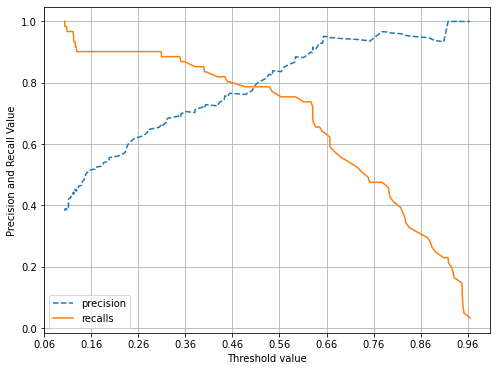

In [83]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로 표현
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle="--", label="precision")
    # 재현율은 실선으로 표현
    plt.plot(thresholds, recalls[:threshold_boundary], label="recalls")
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall Value")
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])
# 아래 그래프에서 교점에 해당하는 x 값이 가장 적절한 임계값임.

### - F1 스코어
- F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우지지 ㅇ낳는 수치를 나타낼 때 상대적으로 높은 값을 가짐.

In [84]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print("F1 score :", f1)

F1 score : 0.7804878048780488


In [94]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)  # 정확도
    precision = precision_score(y_test, pred)  # 정밀도
    recall = recall_score(y_test, pred)  # 재현율
    f1 = f1_score(y_test, pred)  # F1 스코어
    print(confusion)
    print(f"accuracy(정확도): {accuracy}, precision(정밀도): {precision}\n",
          f"recall(재현율): {recall}, f1 score: {f1}\n\n")
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
[[98 20]
 [10 51]]
accuracy(정확도): 0.8324022346368715, precision(정밀도): 0.7183098591549296
 recall(재현율): 0.8360655737704918, f1 score: 0.7727272727272727


임곗값: 0.45
[[103  15]
 [ 12  49]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.765625
 recall(재현율): 0.8032786885245902, f1 score: 0.784


임곗값: 0.5
[[104  14]
 [ 13  48]]
accuracy(정확도): 0.8491620111731844, precision(정밀도): 0.7741935483870968
 recall(재현율): 0.7868852459016393, f1 score: 0.7804878048780488


임곗값: 0.55
[[109   9]
 [ 15  46]]
accuracy(정확도): 0.8659217877094972, precision(정밀도): 0.8363636363636363
 recall(재현율): 0.7540983606557377, f1 score: 0.793103448275862


임곗값: 0.6
[[112   6]
 [ 16  45]]
accuracy(정확도): 0.8770949720670391, precision(정밀도): 0.8823529411764706
 recall(재현율): 0.7377049180327869, f1 score: 0.8035714285714285




### - ROC 곡선과 AUC
- 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다.
- 사용되는 용어 : FPR(False Positive Rate), TPR(True Positive Rate), TNR(True Nagative Rate)
- TPR 은 재현율, 민감도라고도 불린다.
- TNR 은 특이성이다.
- 민감도는(TPR) 실제값 Positive 가 정확히 예측돼야 하는 수준을 나타낸다.
- 특이성은(TNR) 실제값 Negative 가 정확히 예측돼야 하는 수준을 나타낸다.

In [99]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]  # 라벨별 예측확률의 1번째 인덱스값을 가져옴

# roc_curve 모듈을 사용하여 FPR, TPR, 임계값을 반환받음.
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)
print("index of thresholds array:", thr_index)
print("threshold for sample index:", np.round(thresholds[thr_index], 2))  # 임계값

print("FPR by sample threshold:", np.round(fprs[thr_index], 3))  # 임계값별 FPR
print("TPR by sample threshold:", np.round(tprs[thr_index], 3))  # 임계값별 TPR

index of thresholds array: [ 1  6 11 16 21 26 31 36 41 46 51]
threshold for sample index: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
FPR by sample threshold: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
TPR by sample threshold: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


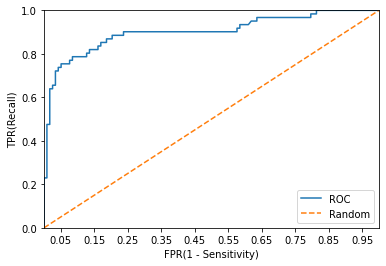

In [100]:
def roc_curve_plot(y_test, pred_proba_1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_1)
    plt.plot(fprs, tprs, label="ROC")  # FPR(X) 의 값에 대한 TPR(Y) 의 값을 그래프로 그림. 
    plt.plot([0,1], [0,1], '--', label="Random")  # 가운데를 지나는 곡선.
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("FPR(1 - Sensitivity)")
    plt.ylabel("TPR(Recall)")
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

### - AUC 값 구하기
- AUC 값이 1에 가까울수록 좋은 것이다.

In [103]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print("ROC AUC value:", roc_score)

ROC AUC value: 0.9024034454015005


In [138]:
def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)  # 정확도
    precision = precision_score(y_test, pred)  # 정밀도
    recall = recall_score(y_test, pred)  # 재현율
    f1 = f1_score(y_test, pred)  # F1 스코어
    if pred_proba is not None: roc_auc = roc_auc_score(y_test, pred_proba)  # AUC 스코어
    else: roc_auc = "pred_proba is None"
    print(confusion)
    print(f"accuracy(정확도): {accuracy}, precision(정밀도): {precision}\n",
          f"recall(재현율): {recall}, f1 score: {f1}, roc_auc value: {roc_auc}\n\n")

### - 피마 인디언 당뇨병 예측

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv("./pima_indian_diabetes_datasets/diabetes.csv")
print(diabetes_data["Outcome"].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [109]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [111]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, 
                                                    stratify=y)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)
pred_proba = lr_model.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

[[90 10]
 [21 33]]
accuracy(정확도): 0.7987012987012987, precision(정밀도): 0.7674418604651163
 recall(재현율): 0.6111111111111112, f1 score: 0.6804123711340206, roc_auc value: 0.807037037037037




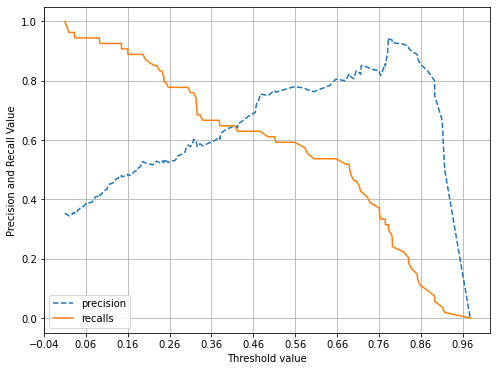

In [112]:
pred_proba_1 = lr_model.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_1)

In [113]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

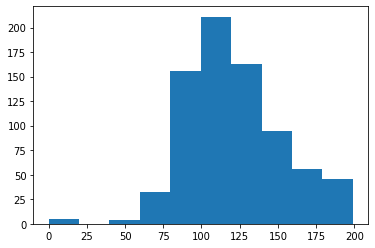

In [114]:
plt.hist(diabetes_data["Glucose"], bins=10)  # 포도당 수치 히스토그램

In [116]:
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

total_count = diabetes_data["Glucose"].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f"{feature} 컬럼에서 0인 개수: {zero_count}, 퍼센트: {100*zero_count/total_count}")

Glucose 컬럼에서 0인 개수: 5, 퍼센트: 0.6510416666666666
BloodPressure 컬럼에서 0인 개수: 35, 퍼센트: 4.557291666666667
SkinThickness 컬럼에서 0인 개수: 227, 퍼센트: 29.557291666666668
Insulin 컬럼에서 0인 개수: 374, 퍼센트: 48.697916666666664
BMI 컬럼에서 0인 개수: 11, 퍼센트: 1.4322916666666667


In [118]:
mean_zero_features = diabetes_data[zero_features].mean()  # 0 을 각 컬럼의 평균값으로 대체.
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [129]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156,
                                                   stratify=y)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)
pred_proba = lr_model.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)
# 재현율이 상대적으로 낮음

[[90 10]
 [21 33]]
accuracy(정확도): 0.7987012987012987, precision(정밀도): 0.7674418604651163
 recall(재현율): 0.6111111111111112, f1 score: 0.6804123711340206, roc_auc value: 0.8453703703703703




In [133]:
thresholds = [0.3, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_model.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)
# 임계값을 바꿔가며 가장 적절한 임계값을 찾음. -> 0.48 이 제일 적합한 임계값임

임곗값: 0.3
[[67 33]
 [11 43]]
accuracy(정확도): 0.7142857142857143, precision(정밀도): 0.5657894736842105
 recall(재현율): 0.7962962962962963, f1 score: 0.6615384615384615, roc_auc value: pred_proba is None


임곗값: 0.36
[[76 24]
 [15 39]]
accuracy(정확도): 0.7467532467532467, precision(정밀도): 0.6190476190476191
 recall(재현율): 0.7222222222222222, f1 score: 0.6666666666666666, roc_auc value: pred_proba is None


임곗값: 0.39
[[79 21]
 [16 38]]
accuracy(정확도): 0.7597402597402597, precision(정밀도): 0.6440677966101694
 recall(재현율): 0.7037037037037037, f1 score: 0.6725663716814159, roc_auc value: pred_proba is None


임곗값: 0.42
[[84 16]
 [18 36]]
accuracy(정확도): 0.7792207792207793, precision(정밀도): 0.6923076923076923
 recall(재현율): 0.6666666666666666, f1 score: 0.6792452830188679, roc_auc value: pred_proba is None


임곗값: 0.45
[[85 15]
 [18 36]]
accuracy(정확도): 0.7857142857142857, precision(정밀도): 0.7058823529411765
 recall(재현율): 0.6666666666666666, f1 score: 0.6857142857142857, roc_auc value: pred_proba is None


임곗값: 0

In [139]:
# 임계값을 0.48 로 하여 예측한 결과
binarizer = Binarizer(threshold=0.48)

pred048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred048, pred_proba[:, 1])

[[89 11]
 [19 35]]
accuracy(정확도): 0.8051948051948052, precision(정밀도): 0.7608695652173914
 recall(재현율): 0.6481481481481481, f1 score: 0.7000000000000001, roc_auc value: 0.8453703703703703


